# **Analyzing Environmental, Social, and Governance (ESG) Issue from World Bank Group**
Copyright (c) [2025] Angel Lanto | Hult International Business School

All rights reserved.
 
This notebook is for educational and informational purposes only. 
Unauthorized copying, reproduction, or distribution is prohibited.


Source: https://databank.worldbank.org/source/environment-social-and-governance-(esg)-data#
File Path: r'C:\Users\Angel\Downloads\Python\ESG-Data.csv'

In this project, I analyzed an ESG dataset by performing data cleaning, exploratory data analysis (EDA), comparative analysis, and finally built an ARIMA forecasting model to predict future global ESG trends. I used Plotly for all interactive visualizations.

# **Data Loading and Cleaning**
First, I loaded the dataset from a CSV file, replaced placeholder values (`..`) with `NaN`, converted year columns to numeric types, dropped unneeded columns, and removed rows with missing country information.

I ensured that the data was in a clean and consistent format. Converting the year columns to numeric values was key to performing time-series analyses later on. Additionally, removing unnecessary columns and rows with missing country data helped streamline the dataset for further analysis.

In [176]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')  # Suppressing warnings during execution


In [177]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Define the file path (adjust as needed)
file_path = r'C:\Users\Angel\Downloads\Python-IA\ESG-Data.csv'

# Load the dataset
data_cleaned = pd.read_csv(file_path)

# Replace placeholder ".." with NaN
data_cleaned.replace("..", pd.NA, inplace=True)

# Identify year columns (columns starting with "20") and convert them to numeric
year_columns = [col for col in data_cleaned.columns if col.startswith('20')]
data_cleaned[year_columns] = data_cleaned[year_columns].apply(pd.to_numeric, errors='coerce')

# Drop unnecessary columns if they exist
columns_to_drop = ["Series Name", "Series Code"]
data_cleaned = data_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Remove rows with missing country information
data_cleaned = data_cleaned.dropna(subset=['Country Name', 'Country Code'])


# **Data Transformation**

I melted the DataFrame so that each row represents a country and a specific year. This was done by converting the wide format (with separate columns for each year) into a long format with a single "Year" column and a "Value" column containing the corresponding values for each country and year.

This transformation allows for easier time-series analysis, as it simplifies the structure of the data, making it more suitable for further processing and analysis.

In [178]:
# Melt the DataFrame so that each row represents a country and a specific year
data_transposed = data_cleaned.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="Value"
)
print("Transposed Data:")
print(data_transposed.head())


Transposed Data:
  Country Name Country Code  Year  Value
0  Afghanistan          AFG  2000    6.7
1      Albania          ALB  2000   38.7
2      Algeria          DZA  2000   96.9
3      Andorra          AND  2000  100.0
4       Angola          AGO  2000   40.1


#  **Data Visualization and Analysis I**

First, I displayed summary statistics of the cleaned dataset to get an overview of the numerical features, including metrics like the mean, standard deviation, and quartiles.

Next, I checked for any missing values across the dataset, helping identify where imputation or data cleaning might be necessary.

Then, I visualized the distribution of ESG values for 2021 by creating an interactive histogram. This provides a visual understanding of how the ESG values are distributed across countries for that year.

Afterward, I computed the correlation between the year columns and created a heatmap. The heatmap provides a visual representation of how strongly the yearly ESG data is correlated, helping to identify any trends or relationships over time.

Finally, I calculated the average ESG score across all countries for each year and created an interactive line plot. This plot shows the average ESG score over time and includes markers at each data point for better visibility.

In [179]:
# Display summary statistics
summary_stats = data_cleaned.describe()
print("Summary statistics:")
print(summary_stats)

Summary statistics:
             2000        2001        2002        2003        2004        2005  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean    56.382979   56.978298   57.581277   58.157021   58.752766   59.330638   
std     39.523477   39.437553   39.319485   39.212390   39.085479   38.952341   
min      0.100000    0.100000    0.100000    0.100000    0.000000    0.000000   
25%     13.650000   15.450000   16.100000   17.250000   17.550000   18.600000   
50%     57.900000   60.000000   62.000000   64.000000   65.300000   66.700000   
75%    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

             2006        2007        2008        2009  ...        2012  \
count  235.000000  235.000000  235.000000  235.000000  ...  235.000000   
mean    59.921702   60.521277   61.112340   61.693191  ...   63.379149   
std     38.796537   38.62862

In [180]:
# Check for missing values in each column
missing_data = data_cleaned.isnull().sum()
print("\nMissing values per column:")
print(missing_data)


Missing values per column:
Country Name    0
Country Code    0
2000            4
2001            4
2002            4
2003            4
2004            4
2005            4
2006            4
2007            4
2008            4
2009            4
2010            4
2011            4
2012            4
2013            4
2014            4
2015            4
2016            4
2017            4
2018            4
2019            4
2020            4
2021            4
dtype: int64


In [181]:
# Plot the distribution of ESG values for 2021
fig = px.histogram(data_cleaned, x='2021', nbins=20, title='Distribution of ESG Data in 2021')
fig.update_layout(xaxis_title='ESG Value', yaxis_title='Frequency')
fig.show()

In [182]:
# Compute correlation between year columns and create a heatmap
corr = data_cleaned[year_columns].corr()
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='Viridis'
))
fig.update_layout(title='Correlation Heatmap of Yearly ESG Data', xaxis_title='Year', yaxis_title='Year')
fig.show()

In [183]:
# Ensure that only numeric columns are selected (those corresponding to the years)
numeric_columns = data_cleaned.columns[2:]  # Assuming columns from index 2 onward are the years (numeric data)

# Convert all the selected columns to numeric, forcing errors to NaN
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Now, calculate the average ESG score across countries for each year
average_esg_score = data_cleaned[numeric_columns].mean(axis=0)

# Create an interactive line plot using Plotly with markers
fig = px.line(
    x=average_esg_score.index, 
    y=average_esg_score.values, 
    title='Average ESG Score Across All Countries (2000-2021)',
    labels={'x': 'Year', 'y': 'Average ESG Score'},
    markers=True  # Add markers at each data point
)

# Show the plot
fig.show()


# **Data Visualization and Analysis II**

First, I extracted and plotted the ESG data for the "World" and the "Philippines" to observe the trends over the years. These visualizations help track how the global and national ESG values evolved over time. I used interactive line plots with markers at each data point to make the trends more visually clear and engaging.

Next, I analyzed the top and least 10 countries by their ESG values in 2021. By creating bar plots, I visualized the countries with the highest and lowest ESG scores for that year, providing insight into the global distribution of ESG performance.

Additionally, I calculated the average ESG values from 2000 to 2021 for each country and displayed the top and least 10 countries based on these averages. This allowed for a more comprehensive view of long-term ESG trends across countries.

Finally, I created a box plot to show the distribution of ESG values by year for all countries, and I filtered the data by regions and income groups to analyze ESG trends within those categories. These visualizations help explore how different regions and income groups performed over the years.

In [184]:
# Extract and plot ESG data for "World"
world_data = data_cleaned[data_cleaned['Country Name'] == 'World'][year_columns].T
world_data.columns = ['ESG Value']
world_data.index.name = 'Year'
world_data.reset_index(inplace=True)

fig_world = px.line(world_data, x='Year', y='ESG Value', 
                      title='ESG Values Over the Years for World', markers=True)
fig_world.update_layout(xaxis_title='Year', yaxis_title='ESG Value')
fig_world.show()

# Extract and plot ESG data for "Philippines"
philippines_data = data_cleaned[data_cleaned['Country Name'] == 'Philippines'][year_columns].T
philippines_data.columns = ['ESG Value']
philippines_data.index.name = 'Year'
philippines_data.reset_index(inplace=True)

fig_philippines = px.line(philippines_data, x='Year', y='ESG Value', 
                           title='ESG Values Over the Years for Philippines', markers=True)
fig_philippines.update_layout(xaxis_title='Year', yaxis_title='ESG Value')
fig_philippines.show()


In [185]:
# Top 10 countries by ESG value in 2021
top_countries_2021 = data_cleaned[['Country Name', '2021']].dropna()
top_countries_2021 = top_countries_2021.sort_values(by='2021', ascending=False).head(10)
fig_top = px.bar(top_countries_2021, x='Country Name', y='2021', 
                 title='Top 10 Countries by ESG Value in 2021')
fig_top.update_layout(xaxis_title='Country Name', yaxis_title='ESG Value')
fig_top.show()

In [186]:
# Least 10 countries by ESG value in 2021
least_countries_2021 = data_cleaned[['Country Name', '2021']].dropna()
least_countries_2021 = least_countries_2021.sort_values(by='2021', ascending=True).head(10)
fig_least = px.bar(least_countries_2021, x='Country Name', y='2021', 
                   title='Least 10 Countries by ESG Value in 2021')
fig_least.update_layout(xaxis_title='Country Name', yaxis_title='ESG Value')
fig_least.show()

In [187]:
# Compute average ESG value from 2000 to 2021 for each country
years_to_average = [str(year) for year in range(2000, 2022)]
data_cleaned['Average ESG Value'] = data_cleaned[years_to_average].mean(axis=1)

In [188]:
# Top 10 countries by average ESG value
top_countries_average = data_cleaned[['Country Name', 'Average ESG Value']].dropna()
top_countries_average = top_countries_average.sort_values(by='Average ESG Value', ascending=False).head(10)
fig_top_avg = px.bar(top_countries_average, x='Country Name', y='Average ESG Value', 
                     title='Top 10 Countries by Average ESG Value (2000-2021)')
fig_top_avg.update_layout(xaxis_title='Country Name', yaxis_title='Average ESG Value')
fig_top_avg.show()

In [189]:
# Least 10 countries by average ESG value
least_countries_average = data_cleaned[['Country Name', 'Average ESG Value']].dropna()
least_countries_average = least_countries_average.sort_values(by='Average ESG Value', ascending=True).head(10)
fig_least_avg = px.bar(least_countries_average, x='Country Name', y='Average ESG Value', 
                       title='Least 10 Countries by Average ESG Value (2000-2021)')
fig_least_avg.update_layout(xaxis_title='Country Name', yaxis_title='Average ESG Value')
fig_least_avg.show()

# **Distribution and Trends**

In this section, I visualized the distribution of ESG values for all countries by creating a box plot. The box plot helps in understanding the spread of ESG values for each year, highlighting the central tendency and any outliers.

I also analyzed ESG trends across regions and income groups by filtering the data accordingly. The resulting line plots reveal how different regions and income groups performed over the years, providing valuable insights into global ESG patterns.

In [190]:
# Reshape the data for a box plot
box_plot_data = data_cleaned.melt(id_vars=['Country Name'], value_vars=year_columns, 
                                  var_name='Year', value_name='ESG Value')

# Create a box plot for all countries using Plotly
fig_box = px.box(box_plot_data, x='Year', y='ESG Value', color='Country Name', 
                 title='Box Plot of ESG Values by Year for All Countries',
                 labels={'Year': 'Year', 'ESG Value': 'ESG Value'})
fig_box.show()

In [191]:
# Define regions and income groups for filtering
regions = [
    'South Asia', 'Europe & Central Asia', 'Middle East & North Africa',
    'Sub-Saharan Africa', 'Latin America & Caribbean', 'East Asia & Pacific',
    'North America'
]

income_groups = [
    'Low income', 'Upper middle income', 'Lower middle income', 'High income'
]

# Filter data for regions and income groups
region_data = data_cleaned[data_cleaned['Country Name'].isin(regions)]
income_data = data_cleaned[data_cleaned['Country Name'].isin(income_groups)]

# Combine ESG data for regions
region_data_combined = pd.DataFrame()
for region in regions:
    region_data_filtered = region_data[region_data['Country Name'] == region]
    region_data_filtered = region_data_filtered[year_columns].T
    region_data_filtered.columns = ['ESG Value']
    region_data_filtered.index.name = 'Year'
    region_data_filtered.reset_index(inplace=True)
    region_data_filtered['Region'] = region
    region_data_combined = pd.concat([region_data_combined, region_data_filtered])

# Plot ESG trends for regions
fig_region = px.line(region_data_combined, x='Year', y='ESG Value', color='Region', 
                     title='ESG Values Over the Years for Different Regions', 
                     labels={'ESG Value': 'ESG Value'}, markers=True)
fig_region.show()

In [192]:
# Combine ESG data for income groups
income_data_combined = pd.DataFrame()
for income_group in income_groups:
    income_data_filtered = income_data[income_data['Country Name'] == income_group]
    income_data_filtered = income_data_filtered[year_columns].T
    income_data_filtered.columns = ['ESG Value']
    income_data_filtered.index.name = 'Year'
    income_data_filtered.reset_index(inplace=True)
    income_data_filtered['Income Group'] = income_group
    income_data_combined = pd.concat([income_data_combined, income_data_filtered])

# Plot ESG trends for income groups
fig_income = px.line(income_data_combined, x='Year', y='ESG Value', color='Income Group', 
                     title='ESG Values Over the Years for Different Income Groups', 
                     labels={'ESG Value': 'ESG Value'}, markers=True)
fig_income.show()

# **ARIMA Time Series Forecasting for World ESG Values**

In this analysis, I forecast global ESG trends using an ARIMA model. I began by extracting the “World” ESG time series, then fitted an ARIMA(1,1,1) model, and finally forecasted the next five years. All results—including the forecast and its confidence intervals—are visualized using Plotly.

1. Model Summary: The ARIMA model summary provides key insights into the statistical significance of the model parameters and overall fit. This output is crucial for evaluating whether the model effectively captures the underlying data patterns.

2. Forecast Visualization: The forecast plot overlays historical ESG data with predicted values for the next five years. The shaded confidence interval illustrates the uncertainty in the predictions, offering a visual measure of the forecast’s reliability.

3. Residual Diagnostics: Residual Time Series: The residuals should display random fluctuations if the model has accurately captured the trend and patterns in the data.

4. Histogram of Residuals: A roughly normal distribution of residuals is expected, as it validates the assumption of normality underlying the ARIMA model’s error term.

In [193]:
# Extract ESG Time Series Data for "World"
world_data = data_cleaned[data_cleaned['Country Name'] == 'World'][year_columns].T
world_data.columns = ['ESG Value']
world_data.index.name = 'Year'
world_data.reset_index(inplace=True)
world_data['Year'] = pd.to_datetime(world_data['Year'], format='%Y')
world_data.set_index('Year', inplace=True)

print("World ESG Time Series:")
print(world_data.head())

World ESG Time Series:
            ESG Value
Year                 
2000-01-01       49.1
2001-01-01       49.7
2002-01-01       50.4
2003-01-01       51.0
2004-01-01       51.8


In [194]:
# Seasonal Decomposition (Visualized with Plotly)
# Since the data is annual, we set period=5 as an example; adjust if a different cycle is expected.
decomposition = seasonal_decompose(world_data['ESG Value'], model='additive', period=5)

# Create a Plotly figure with 4 subplots: Observed, Trend, Seasonal, and Residual components
fig_decomp = make_subplots(rows=4, cols=1, shared_xaxes=True,
                           subplot_titles=["Observed", "Trend", "Seasonal", "Residual"])

fig_decomp.add_trace(go.Scatter(x=decomposition.observed.index, y=decomposition.observed,
                                mode='lines', name='Observed'),
                     row=1, col=1)
fig_decomp.add_trace(go.Scatter(x=decomposition.trend.index, y=decomposition.trend,
                                mode='lines', name='Trend'),
                     row=2, col=1)
fig_decomp.add_trace(go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal,
                                mode='lines', name='Seasonal'),
                     row=3, col=1)
fig_decomp.add_trace(go.Scatter(x=decomposition.resid.index, y=decomposition.resid,
                                mode='lines', name='Residual'),
                     row=4, col=1)

fig_decomp.update_layout(height=800, title_text="Seasonal Decomposition of World ESG Values")
fig_decomp.show()

In [195]:
# Test for Stationarity Using the Augmented Dickey-Fuller Test
adf_result = adfuller(world_data['ESG Value'].dropna())
print("ADF Statistic: %f" % adf_result[0])
print("p-value: %f" % adf_result[1])
if adf_result[1] < 0.05:
    print("The time series appears to be stationary (reject the null hypothesis).")
else:
    print("The time series appears to be non-stationary (fail to reject the null hypothesis).")



ADF Statistic: -6.843818
p-value: 0.000000
The time series appears to be stationary (reject the null hypothesis).


In [196]:
# Fit an ARIMA Model and Forecast
# Fit ARIMA(1,1,1) model: p=1, d=1, q=1.
model = ARIMA(world_data['ESG Value'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              ESG Value   No. Observations:                   22
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   9.464
Date:                Fri, 07 Mar 2025   AIC                            -12.927
Time:                        13:42:20   BIC                             -9.793
Sample:                    01-01-2000   HQIC                           -12.247
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9960      0.014     69.502      0.000       0.968       1.024
ma.L1         -0.3912      0.482     -0.812      0.417      -1.335       0.553
sigma2         0.0196      0.008      2.575      0.0

In [197]:
# Forecast the next 5 years
forecast_steps = 5
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_conf_int = forecast.conf_int()

# Create a new datetime index for the forecast period
forecast_index = pd.date_range(start=world_data.index[-1] + pd.DateOffset(years=1), 
                               periods=forecast_steps, freq='Y')
forecast_series = forecast.predicted_mean
forecast_series.index = forecast_index
forecast_conf_int.index = forecast_index

# Plot the observed data, forecast, and confidence intervals using Plotly
fig_forecast = go.Figure()

# Observed ESG values
fig_forecast.add_trace(go.Scatter(
    x=world_data.index,
    y=world_data['ESG Value'],
    mode='lines+markers',
    name='Observed'
))

# Forecasted ESG values
fig_forecast.add_trace(go.Scatter(
    x=forecast_series.index,
    y=forecast_series,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='red')
))

# Confidence interval as a filled area
fig_forecast.add_trace(go.Scatter(
    x = list(forecast_conf_int.index) + list(forecast_conf_int.index[::-1]),
    y = list(forecast_conf_int.iloc[:, 0]) + list(forecast_conf_int.iloc[:, 1][::-1]),
    fill='toself',
    fillcolor='rgba(255,182,193,0.3)',  # Light pink fill
    line=dict(color='rgba(255,182,193,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='Confidence Interval'
))

fig_forecast.update_layout(
    title='Forecast of World ESG Values using ARIMA(1,1,1)',
    xaxis_title='Year',
    yaxis_title='ESG Value',
    template='plotly_white'
)
fig_forecast.show()





In [198]:
# Residual Diagnostics Using Plotly
# Calculate residuals from the ARIMA model
residuals = model_fit.resid

# Residuals over time (Line Plot)
fig_resid_line = go.Figure()
fig_resid_line.add_trace(go.Scatter(
    x=world_data.index,
    y=residuals,
    mode='lines+markers',
    name='Residuals'
))
fig_resid_line.update_layout(
    title='Residuals of ARIMA(1,1,1) Model (Time Series)',
    xaxis_title='Year',
    yaxis_title='Residuals',
    template='plotly_white'
)
fig_resid_line.show()


In [199]:
# Histogram of residuals
fig_resid_hist = px.histogram(x=residuals, nbins=20, title='Histogram of ARIMA Model Residuals')
fig_resid_hist.update_layout(
    xaxis_title='Residual Value',
    yaxis_title='Count',
    template='plotly_white'
)
fig_resid_hist.show()

# **Clustering Analysis**

We will perform clustering to group countries based on their ESG indicators over time.

In [200]:
# Filter out rows after 'Zimbabwe'
filtered_data = data_cleaned[data_cleaned['Country Name'] <= 'Zimbabwe']

# Apply KMeans clustering (let's try 3 clusters as an example)
kmeans = KMeans(n_clusters=3)
filtered_data['Cluster'] = kmeans.fit_predict(filtered_data.iloc[:, 2:].fillna(0))

# Remove rows corresponding to regions and income categories
regions_and_income = [
    'South Asia', 'Europe & Central Asia', 'Middle East & North Africa', 'Sub-Saharan Africa', 
    'Latin America & Caribbean', 'East Asia & Pacific', 'North America', 'Low income', 
    'Upper middle income', 'Lower middle income', 'High income', 'IDA only', 'IBRD only', 
    'Not classified', 'IDA blend'
]

# Filter out rows where 'Country Name' is in the regions_and_income list
filtered_data = filtered_data[~filtered_data['Country Name'].isin(regions_and_income)]

# Create an interactive scatter plot using Plotly
fig = px.scatter(
    filtered_data, 
    x='Country Name', 
    y='2021',  # Using the 2021 ESG Score as an example; you can choose any other year
    color='Cluster', 
    title='Clustering of Countries Based on ESG Indicators',
    labels={'Country Name': 'Country', '2021': 'ESG Score in 2021'},
    color_continuous_scale='Viridis'
)

# Widen the legend and the graph
fig.update_layout(
    xaxis_title='Country', 
    yaxis_title='ESG Score in 2021', 
    xaxis_tickangle=-90,
    width=1200,  # Increase the width of the graph
    height=800,  # Increase the height of the graph
    legend=dict(
        title='Cluster',
        x=1.05,  # Move the legend to the right
        y=1,     # Adjust vertical position
        traceorder='normal',
        font=dict(size=12),
        bordercolor="Black",
        borderwidth=1
    )
)

fig.show()


# **Correlation between ESG Score and GDP Growth in 2021**

In [201]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Define the file path (adjust as needed)
file_path = r'C:\Users\Angel\Downloads\Python-IA\GDP Growth-Data.csv'

# Load the dataset
gdp_data = pd.read_csv(file_path)

# Replace placeholder ".." with NaN
gdp_data.replace("..", pd.NA, inplace=True)

# Identify year columns (columns starting with "20") and convert them to numeric
year_columns = [col for col in gdp_data.columns if col.startswith('20')]
gdp_data[year_columns] = gdp_data[year_columns].apply(pd.to_numeric, errors='coerce')

# Drop unnecessary columns if they exist
columns_to_drop = ["Series Name", "Series Code"]
gdp_data = gdp_data.drop(columns=columns_to_drop, errors='ignore')

# Remove rows with missing country information
gdp_data = gdp_data.dropna(subset=['Country Name', 'Country Code'])

# Merge the ESG and GDP growth datasets on 'Country Name'
merged_data = pd.merge(data_cleaned, gdp_data, on='Country Name', suffixes=('_ESG', '_GDP'))

# Inspect the first few rows of the merged dataset
merged_data.head()

,Country Name,Country Code_ESG,2000_ESG,2001_ESG,2002_ESG,2003_ESG,2004_ESG,2005_ESG,2006_ESG,2007_ESG,...,2014_GDP,2015_GDP,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2021_GDP,2022,2023
0,Afghanistan,AFG,6.7,7.7,8.8,10.0,11.1,12.5,13.9,15.3,...,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,2.710887
1,Albania,ALB,38.7,41.0,43.8,46.5,49.2,52.0,54.8,57.8,...,1.774449,2.218726,3.314981,3.802599,4.019346,2.062568,-3.313716,8.969553,4.826688,3.936625
2,Algeria,DZA,96.9,97.3,97.6,97.9,98.2,98.4,98.6,98.8,...,4.100000,3.200000,3.900000,1.500000,1.400000,0.900000,-5.000000,3.800000,3.600000,4.100000
3,Andorra,AND,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548,-11.183940,8.286779,9.564612,2.583555
4,Angola,AGO,40.1,40.7,41.2,41.5,42.2,42.6,42.9,43.3,...,4.822559,0.943572,-2.580050,-0.147213,-1.316362,-0.702273,-5.638215,1.199211,3.044727,1.001289


Correlation between ESG Score and GDP Growth in 2021: 0.28


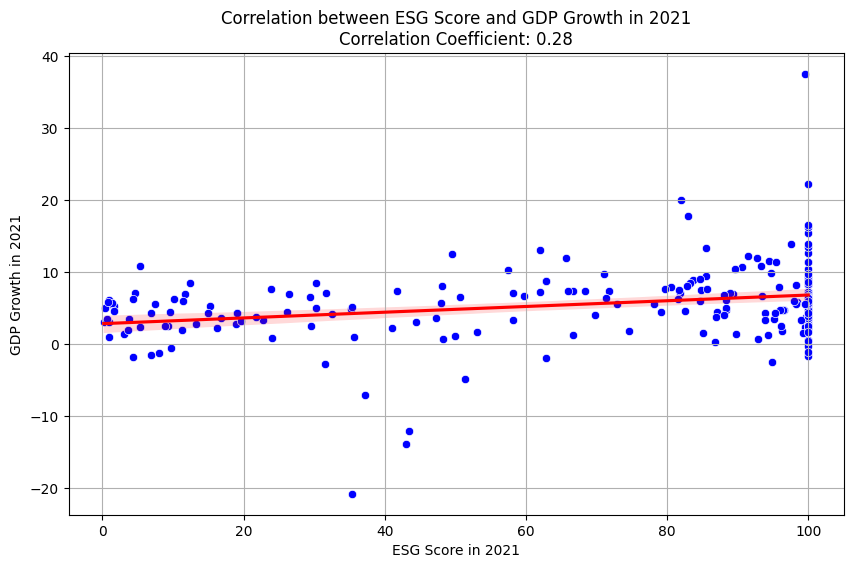

In [208]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_data is already created from your previous code
# Calculate the correlation between ESG and GDP growth for 2021
correlation = merged_data['2021_ESG'].corr(merged_data['2021_GDP'])

# Print correlation value
print(f"Correlation between ESG Score and GDP Growth in 2021: {correlation:.2f}")

# Plotting the scatter plot with regression line using seaborn
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x=merged_data['2021_ESG'], y=merged_data['2021_GDP'], color='blue')

# Fit a regression line (linear trendline)
sns.regplot(x=merged_data['2021_ESG'], y=merged_data['2021_GDP'], scatter=False, color='red')

# Adding labels and title
plt.title(f'Correlation between ESG Score and GDP Growth in 2021\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('ESG Score in 2021')
plt.ylabel('GDP Growth in 2021')
plt.grid(True)

# Show the plot
plt.show()

# Plotting the scatter plot with Plotly (interactive)
fig = px.scatter(
    merged_data, 
    x='2021_ESG', 
    y='2021_GDP', 
    title=f'ESG Score vs GDP Growth in 2021\nCorrelation Coefficient: {correlation:.2f}',
    labels={'2021_ESG': 'ESG Score in 2021', '2021_GDP': 'GDP Growth in 2021'},
    color_discrete_sequence=['blue']
)

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')))
fig.show()

# **Final Remarks**
Overall, I observed distinct ESG trends across countries, regions, and income groups. The analysis revealed both short-term and long-term patterns, and the ARIMA forecast provides a preliminary projection of global ESG values.